In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib notebook

In [2]:
plt.style.use('ggplot')

In [3]:
df=pd.read_csv("matches.csv")

In [4]:
df.loc[(df.winner=='Delhi Daredevils','winner')]='Delhi Capitals'
df.loc[(df.team1=='Delhi Daredevils','team1')]='Delhi Capitals'
df.loc[(df.team2=='Delhi Daredevils','team2')]='Delhi Capitals'
df.loc[(df.toss_winner=='Delhi Daredevils','toss_winner')]='Delhi Capitals'

df.loc[(df.winner=='Rising Pune Supergiant','winner')]='Rising Pune Supergiants'
df.loc[(df.team1=='Rising Pune Supergiant','team1')]='Rising Pune Supergiants'
df.loc[(df.team2=='Rising Pune Supergiant','team2')]='Rising Pune Supergiants'
df.loc[(df.toss_winner=='Rising Pune Supergiant','toss_winner')]='Rising Pune Supergiants'


In [5]:
teams

NameError: name 'teams' is not defined

In [6]:
teams=np.array(df.winner.value_counts().index.values)[0:8]

In [7]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [8]:
win=df.winner.value_counts()
home_wins=df[df.winner==df.team1].team1.value_counts()

names=['MI','CSK','KKR','RCB','KXIP','DC','RR','SRH']
color=pd.read_csv('color.csv')
c=[color[i].values for i in names]

years=np.array(df.season.value_counts().index.values)
years.sort()

In [9]:
toss_winners=df[df.toss_winner==df.winner].winner.value_counts() # won toss won match
toss_choice=df.toss_decision.value_counts()
won_field=df[np.logical_or(np.logical_and((df.toss_winner==df.winner),(df.toss_decision=='field')),\
                           np.logical_and((df.winner!=df.toss_winner),(df.toss_decision!='field')))]

winner_by_season=pd.DataFrame(df[df.winner.isin(teams)].groupby('winner').season.value_counts().sort_index())

In [10]:
won_field.winner.value_counts()

Kolkata Knight Riders          58
Mumbai Indians                 51
Chennai Super Kings            49
Royal Challengers Bangalore    49
Delhi Capitals                 49
Rajasthan Royals               46
Kings XI Punjab                44
Sunrisers Hyderabad            28
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants        10
Pune Warriors                   6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

In [11]:
wickets=df[df.win_by_wickets!=0].win_by_wickets.values
runs=df[df.win_by_runs!=0].win_by_runs.values

(-1.0, 8.0, 0.0, 100.0)

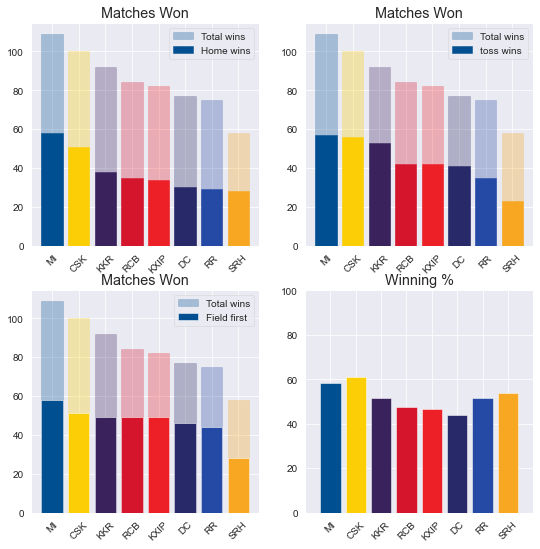

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(9,9))
plt.subplot('221')
plt.bar(names,win.values[0:8],color=c,alpha=.3,label='Total wins',edgecolor=c)
plt.bar(names,home_wins.values[0:8],color=c,label='Home wins',edgecolor=c)
plt.xticks(rotation=45)
plt.title("Matches Won")
plt.legend()

plt.subplot('222')

plt.bar(names,win.values[0:8],color=c,alpha=.3,label='Total wins',edgecolor=c)
plt.bar(names,toss_winners.values[0:8],color=c,label='toss wins',edgecolor=c)
plt.xticks(rotation=45)
plt.title("Matches Won")
plt.legend()

plt.subplot('223')

plt.bar(names,win.values[0:8],color=c,alpha=.3,label='Total wins',edgecolor=c)
plt.bar(names,won_field.winner.value_counts().values[0:8],color=c,label='Field first')
plt.xticks(rotation=45)
plt.title("Matches Won")
plt.legend()

plt.subplot('224')
s=list()
for i in teams:
    w=df[df.winner==i].winner.count()
    total=df[np.logical_or((df.team1==i),(df.team2==i))].winner.count()
    s.append(w*100/total)
plt.bar(names,s,color=c)
plt.title('Winning %')
plt.xticks(rotation=45)
#plt.yticks(range(0,101,10))
plt.gca().axis([-1,8,0,100])


# Matches won by teams in each season

In [15]:
df[df.winner.isin(teams)].groupby('winner').season.value_counts().sort_index()
temp=pd.DataFrame(index=years)
temp

""
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


<IPython.core.display.Javascript object>


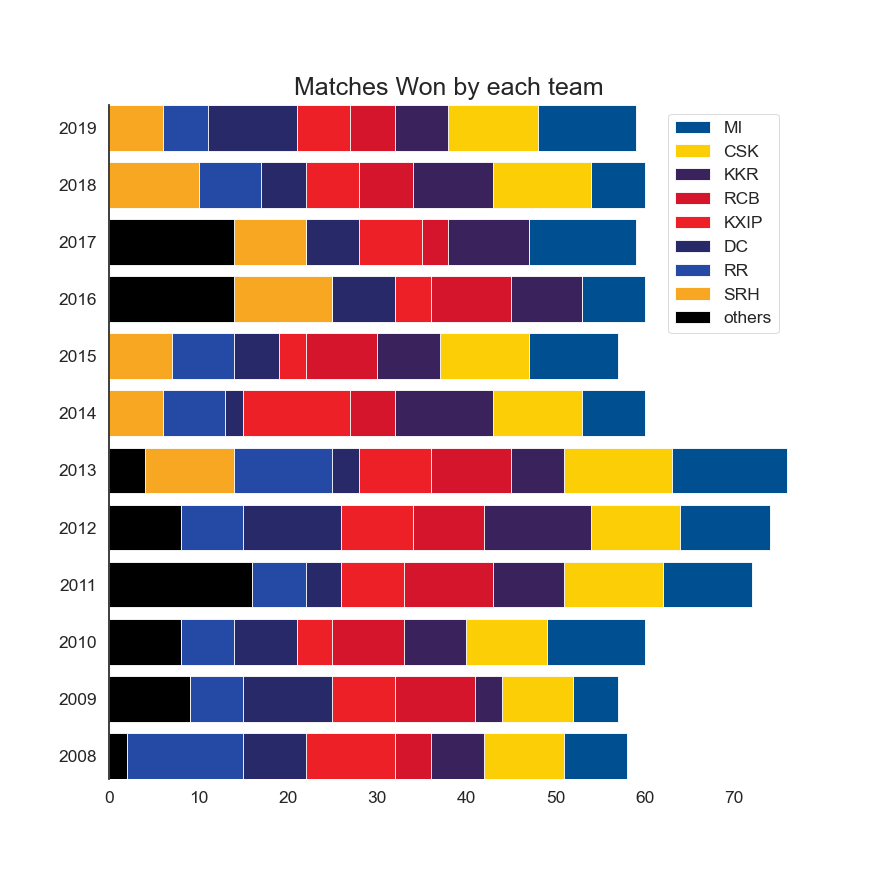

In [752]:
sns.set_style('white')
winner_by_season=pd.DataFrame(df[df.winner.isin(teams)].groupby('winner').season.value_counts().sort_index())
d=df.groupby('season').winner.count().values
plt.figure(figsize=(7,7))
temp=pd.DataFrame(index=years)
temp['season']=0
a=np.zeros(12)
k=0
for i in teams:
    t=pd.DataFrame(winner_by_season.loc[i].season)
    mergedDf = temp.merge(t,how='left' ,left_index=True, right_index=True).fillna(0)

    
    plt.barh(years,d,label=names[k],color=c[k])
   # plt.plot(years,d)
    d=d-mergedDf.season_y.values
    
    k=k+1
plt.barh(years,d,color='black',label='others')
plt.legend()
plt.yticks(years)
plt.title('Matches Won by each team')
plt.margins(0)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

# Matches won by Wickets or Runs

<IPython.core.display.Javascript object>


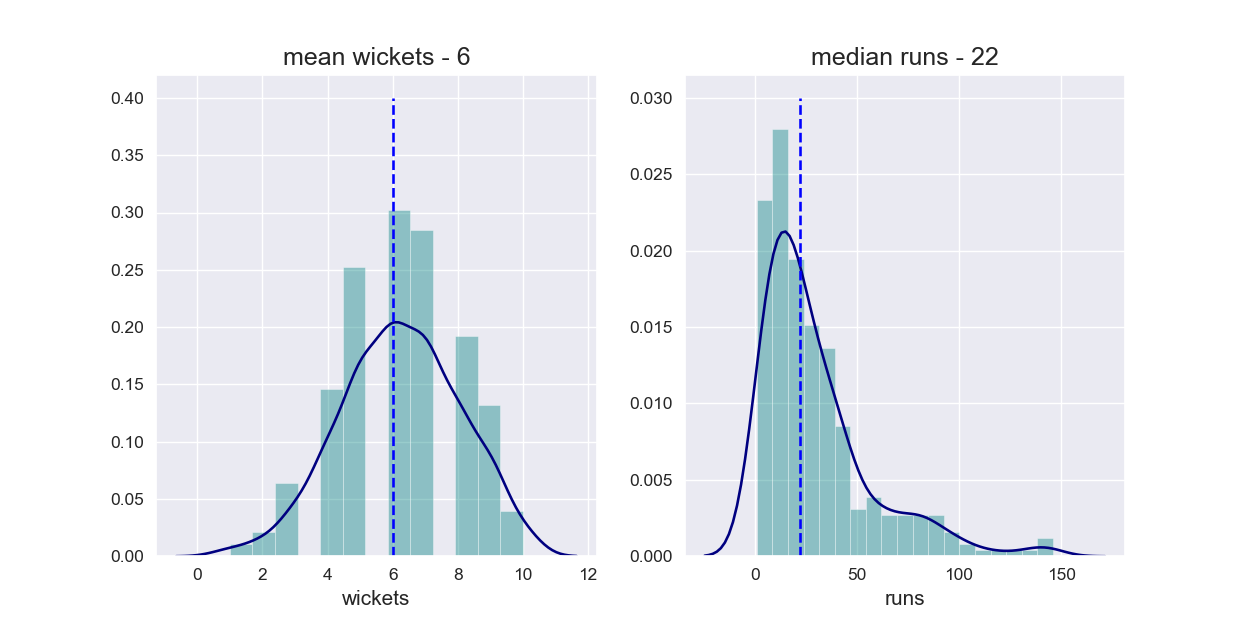

Text(0.5, 0, 'runs')

In [256]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,5))
plt.subplot('121')
sns.distplot(wickets, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})
plt.xlabel('wickets')
plt.title("mean wickets - {}".format(int(wickets.mean())))
plt.plot([6,6],[0,.4],'--b')
plt.subplot('122')

sns.distplot(runs, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})
plt.title("median runs - {}".format(int(np.median(runs))))
plt.plot([np.median(runs),np.median(runs)],[0,.030],'--b')
plt.xlabel('runs')

<IPython.core.display.Javascript object>


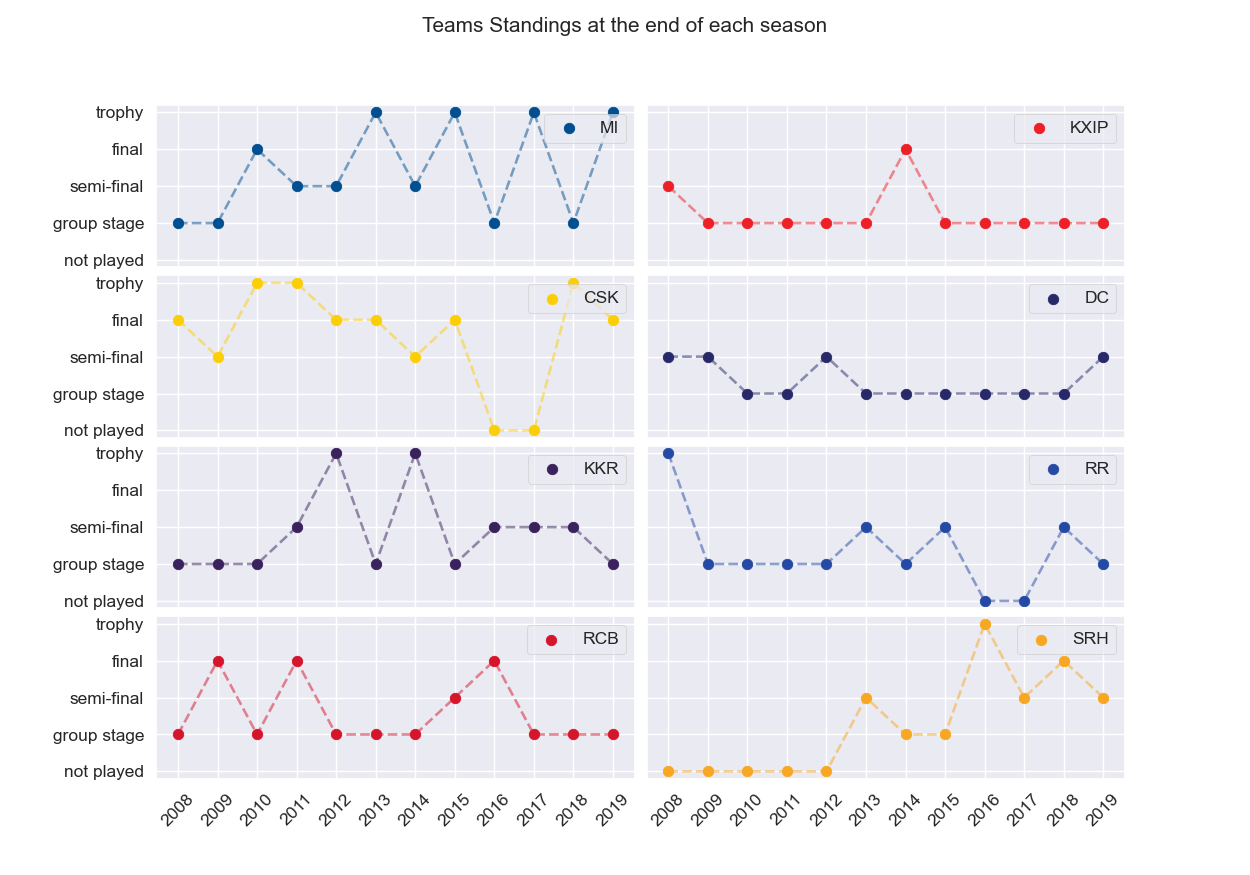

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [556]:
sns.set_style('darkgrid')
ranking =[[1,1,3,2,2,4,2,4,1,4,1,4],[3,2,4,4,3,3,2,3,0,0,4,3],[1,1,1,2,4,1,4,1,2,2,2,1],[1,3,1,3,1,1,1,2,3,1,1,1],[2,1,1,1,1,1,3,1,1,1,1,1],[2,2,1,1,2,1,1,1,1,1,1,2],[4,1,1,1,1,2,1,2,0,0,2,1],[0,0,0,0,0,2,1,1,4,2,3,2]]
ranking=np.array(ranking)
fig,ax=plt.subplots(4,2,figsize=(10,7),sharex=True,sharey=True)
t=0

plt.setp(ax, yticks=[0,1,2,3,4], yticklabels=['not played','group stage','semi-final','final','trophy'],xticks=years)
fig.suptitle("Teams Standings at the end of each season")

for i in range(len(names)):
    s=i%4
    if i>3:
        t=1
    ax[s,t].scatter(years,ranking[i],label=names[i],c=c[i])
    
    ax[s,t].legend(loc = "upper right",framealpha = 0.70)
    ax[s,t].plot(years,ranking[i],'--',c=c[i],alpha=.5)
    ax[s,t].set_xticklabels(years, rotation=45)
    
    
        
plt.subplots_adjust(wspace=0.025, hspace=0.05)
#fig.yticks([0,1,2,3,4])
#plt.yticks(['not played','group stage','semi-final','final','trophy'])

In [753]:
head_to_head=pd.DataFrame(columns=list(teams)+['other'],index=list(teams)+['other']).fillna(0)
team1=df[df.winner.isin(teams)].team1.values
team2=df[df.winner.isin(teams)].team2.values
winner=df[df.winner.isin(teams)].winner.values

for a,b,c in zip(team1,team2,winner):
    if a not in teams:
        a='other'
    if b not in teams:
        b='other'
    if c==a:
        head_to_head.loc[c,b]+=1
    else:
        head_to_head.loc[c,a]+=1
head_to_head.drop(['other'],axis=1,inplace=True)

In [744]:
head_to_head

,Mumbai Indians,Chennai Super Kings,Kolkata Knight Riders,Royal Challengers Bangalore,Kings XI Punjab,Delhi Capitals,Rajasthan Royals,Sunrisers Hyderabad
Mumbai Indians,0,17,19,16,13,12,10,7
Chennai Super Kings,11,0,13,15,12,15,14,9
Kolkata Knight Riders,6,7,0,14,17,13,10,10
Royal Challengers Bangalore,9,8,10,0,12,14,8,6
Kings XI Punjab,11,9,8,12,0,14,9,4
Delhi Capitals,12,6,10,8,10,0,9,6
Rajasthan Royals,10,7,10,10,10,11,0,5
Sunrisers Hyderabad,7,3,7,8,10,9,6,0
other,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>


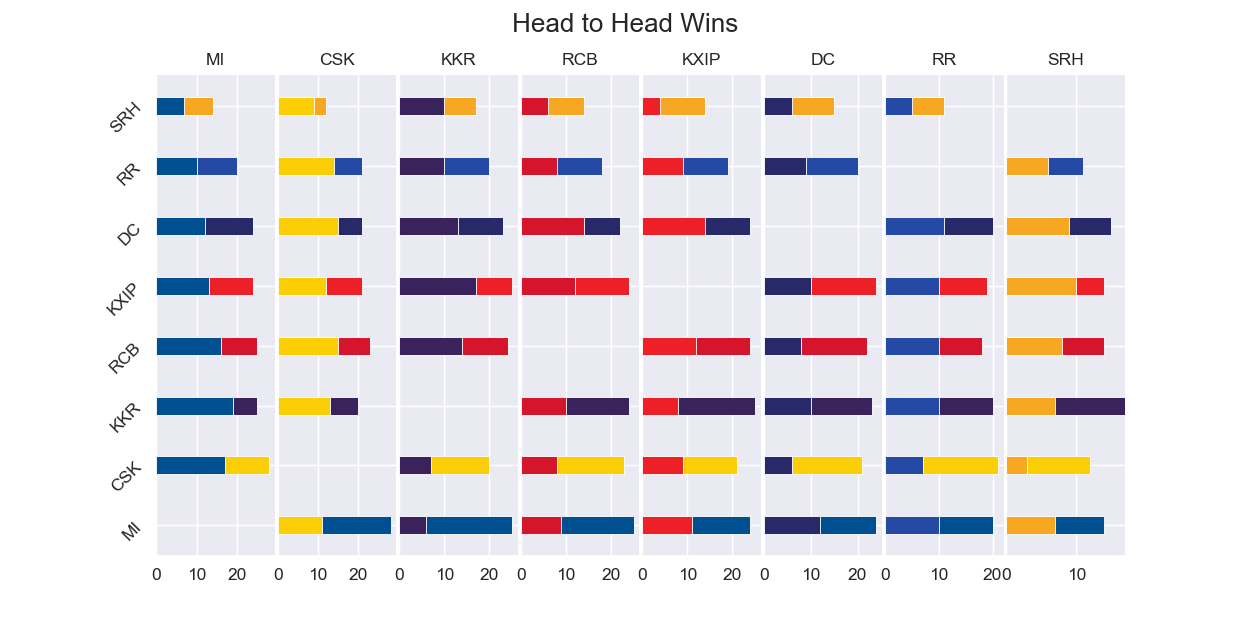

In [754]:
color=pd.read_csv('color.csv')
c=[color[i].values for i in names]
sns.set_style("darkgrid")

fig ,ax=plt.subplots(1,8,figsize=(10,5),sharey=True)
plt.setp(ax, xticks=[0,5,10,15])
fig.suptitle("Head to Head Wins",size=15)
for i in range(8):
    #plt.setp(ax, yticks=[0,5,10,15])
    
    x=head_to_head.columns.values
   
    y=head_to_head.iloc[i].values
    y1=head_to_head.iloc[:,i].values[0:8]
    
    ax[i].barh(x,y1+y,color=c+[[0,0,0]],height=.3)
    ax[i].barh(x,y,color=c[i],height=.3)
    ax[i].set_yticklabels(names+['other'], rotation=45,size=10)
   
    #ax[i].set_ylabel(names[i])
    ax[i].set_title(names[i],size=10)
plt.setp(ax, xticks=[0,10,20])
plt.subplots_adjust(wspace=0.025, hspace=0.5)
sns.despine(left=True)
plt.margins(0)